In [77]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial as ft
import seaborn as sns
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [78]:
# Formula escrita directamente en codigo
def my_binomial(k,n,p):
    return (ft(n)/(ft(k)*ft(n-k)))*(p**k)*((1-p)**(n-k))

In [79]:
# Utilizando la funcion de la libreria scypi
k=1 # Numero de exitos
n=3 # Numero de intentos
p=0.5 # Probabilidad de exito
print('mi binomial da como probabilidad'+str(my_binomial(k, n, p)))
# 3 es el numero de lanzamiento de la variable discreta
# P=0.5, la probabilidad de las variables discretas perfectamente equilibradas
dist = binom(n,p)
# pmf -> Donde 2 representa la cantidad de exitos que queremos
print('Validando con la distribucion obtenida del modelo '+str(dist.pmf(k)))

mi binomial da como probabilidad0.375
Validando con la distribucion obtenida del modelo 0.3750000000000001


## Validación del ejercicio hecho a mano, utilizando pmf

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [80]:
# Calculo utilizando, las probabilidades puntuales y sumandolas, para el calculo
# de tres monedas
x=0
for i in range(0,3):
    dist=binom(3,0.5)
    x=x+dist_i.pmf(i)
print(x)

0.8750000000000002


- Arriba validacion a mano, pero usando los valores puntuales PMF
- Abajo utilizando el atributo de CDF, para el caso del ejercicio propuesto a resolver

In [81]:
# Para hacerlo sin necesidad del codigo anterior validando que 
# coinciden la pmf con la cdf 
# para simplemente calcular la probabilidad acumulada usar
dist.cdf(2)

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version

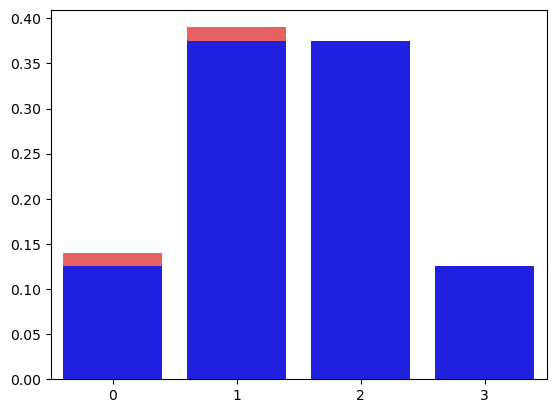

/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version

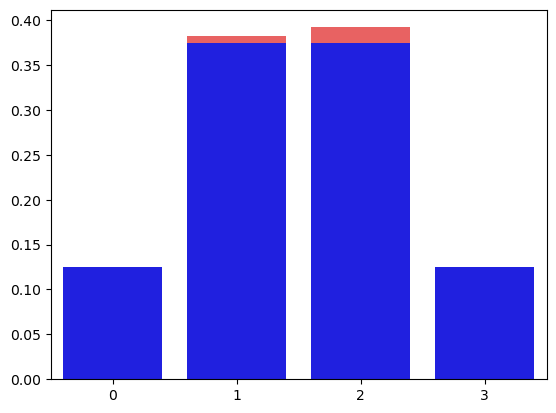

/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version

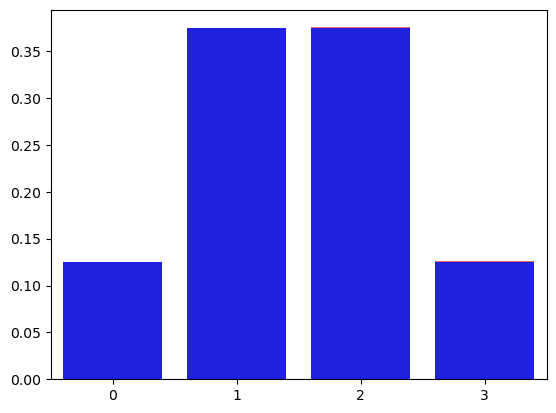

[0.125, 0.3750000000000001, 0.3750000000000001, 0.125]

In [84]:
# Generador aleatorio
p=0.5
# Numero de monedas
n=3
# binomial(n,p)
def plot_by_trial(numero_de_lanzamientos):
    # Estados posibles
    values = [0,1,2,3]
    # Lanzando 3 monedas N_veces y guardando los resultados
    arr=[]
    for i in range(numero_de_lanzamientos):
        # Generacion aleatoria de resultados utilizando numpy
        arr.append(binomial(n,p))
    # Estimacion de probabilidad frecuentista vs la teorica
    prob_freq = np.unique(arr, return_counts=True)[1]/len(arr)
    prob_teorica = [dist.pmf(x) for x in values]
    
    sns.barplot(y=prob_freq, x=values, color='red', alpha=0.7)
    sns.barplot(y=prob_teorica, x=values, color='blue')
    plt.show()

    return prob_teorica
# Mientras mas intentos se hagan 
plot_by_trial(100)
plot_by_trial(1000)
plot_by_trial(10000)
# Mas coinciden las escuelas frecuentistas y bayesianas